# Final Project Submission 2/5
 - Student name: Morgan Jones
 - Student pace: Full Time
 - Scheduled project review date/time: Mon, Jun 22, 2020, 4:00 PM - 4:45 PM France; Paris (GMT+2:00) [DST]
 - Instructor name: Abhineet Kulkarni
 - Blog post URL:
 ***

# Introduction

## Business Case

Generative models can be considered one of the most powerful variety of machine learning to date. Like other generative models, GANs are capable of creating new data instances that resemble a particular training dataset. **For the purposes of the hypothetical business case related to Netflix, we will use GANs to create images resembling the faces of a person's social media network, which can be used to supplant the original cast in a movie or television show being streamed on the Netflix platform**. This could **lead to creating casts that are more relatable to a viewer based on the images of those that the viewer interacts with on social media. This relatability which many viewers do not typically enjoy from the movies and shows they currently watch can lead to an increase in user satisfaction of the Netflix Platform, and thus to an increase in the member base**.

Before beginning the process of generating and training a GAN, we will take a brief look into the GAN architecture, and how GANs are able to generate these images.

## Generative Adversarial Network Architecture

Generative Adversarial Networks (GANs) are unique from many other deep neural networks in that they are actually a combination of two networks functioning in tandem, and produce 2 outputs. In the GAN structure there is a model which generates data, called the Generator, and there is a model which classifies its input as either originating from the Generator, or from the real training set called the Discriminator.

<img src='imgs\notebook_images\gan_archi_2.png' width="750" align="center">

##### The Discriminator

The discriminator referred to as $D$ is responsible for the adversarial nature of the GAN. The discriminator is a classifier which in most cases outputs a probability that a particular data instance it receives is either from the training data, or from the generator. For the purposes of this project, the real images will be that of faces scraped from LinkedIn. For the discriminator, these are considered the positive class while it is training. The negative class while training is therefore those images that have been created by the generator. During training of the discriminator:

<img src='imgs\notebook_images\discriminator2.png' align="center">

 1. The input data from the two sources are classified based on the discriminator's predictions
 2. The discriminator loss applies a penalty for any misclassification that may have occurred. 
 3. The discriminator then updates its weights through the process of backpropagation.

##### The Generator

The generator known as $G$ is therefore responsible for the generative component of the GAN. The generator is able to create data which is meant to replicate the training data, and creates said data from a random input known as the Latent Noise Vector. This random noise referred to as $z$ is then transformed into an output that is similar to the training data by receiving feedback from the Discriminator. As various experiments have demonstrated that the distribution of this noise is not relevant for the Generator to produce an acceptable output, it is common to begin with noise of a uniform distribution, and often the latent space that the noise is sampled from has a smaller dimensionality than the dimensionality of the output space. In order to train the generator to transform this random noise into data indistinguishable from the training set, the networks weights are adjusted based on the discriminators output. The process is as follows:

<img src='imgs\notebook_images\generator.png' align="center">

1. Input noise vector.
2. Generator produces an output based on the noise vector.
3. The discriminator classifies this output as the positive or negative class.
4. The loss is calculated based on said classification which penalizes the generator for not outputting data classified as positive.
5. Backpropagate through both the discriminator and generator in order to obtain the gradients.
6. The gradients then adjust the generator's weights.

##### Alternating Training

The training process in a GAN is also quite different to that of other neural networks. Due to the fact that two networks need to be trained, a convergence must be made that indicates an equilibrium between both the generator and the discriminator. This is achieved through alternating training where the networks do not train simultaneously, but take turns much like movement of the feet in order to reach the destination of convergence. These alternating steps are:

1. The discriminator trains with the data from the two sources for x number of epochs.
2. The generator then trains based on the discriminator output for x number of epochs.
3. This continually repeats for n number of epochs.

In both instances, while one network is training the other has its layers set as untrainable. As the generator continues to train and improves, the discriminator's performance continues to degrade. Upon convergence the discriminator reaches 50% accuracy as it is only randomly able to determine if an instance belongs to the training set or to the generator sample.

##### Loss Function

The true effort of GANs as first described by Ian Goodfellow, et al 2014 is to replicate a probability distribution, the distribution between the training data and the generated data. While there is still work involved in determining how calculates the difference between two distributions the most common loss function which was introduced in the titular paper is minimax loss, stated as: 

<img src='imgs\notebook_images\loss_function.png' align="center">

Where: 

- $D(x)$ = discriminator's classification, the probability that real data instance x is real.


- $Ex$ = expected value over all real data instances.


- $G(z)$ = generator's output when given noise z.


- $D(G(z))$ = discriminator's classification, the probability that a fake instance is real.


- $Ez$ =  expected value over all random inputs to the generator G(z)).

The formula derives from the cross-entropy between the real and generated distributions. The generator can't directly affect the $log(D(x))$ term in the function, so, for the generator, minimizing the loss is equivalent to minimizing the log of the inverse probability predicted by the discriminator for fake images: $log(1 - D(G(z)))$.

While the generator attempts to minimize the minimax function by generating samples that have a low probability of being fake, the discriminator tries to maximize the probability of assigning the correct label to both training examples and samples from the generator.

##### Attribution

The GAN architecture and implementation for this notebook is described in this paper [[Cite:radford2015unsupervised]](https://arxiv.org/abs/1511.06434), and further explored by Jeff Heaton in his T81-558: Applications of Deep Neural Networks course part 7.2 of Washington University in St. Louis https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_07_2_Keras_gan.ipynb. Thank you both for your contributions to this field.

# Importing libraries

When conducting adversarial training, it is best to utilize a GPU as a CPU is often ineffective when it comes to the amount of training involved. Further for some architectures of GAN such as StyleGAN, a GPU is considered necessary. The following cell therefore is used to access google drive when working within Google CoLab. It is also important to note that to use GPU support in Goolge CoLab, one may need to change the runtime type to GPU within the settings of Google CoLab.

In [0]:
# If running in Google CoLab
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
except:
    print("Note: not using Google CoLab")
    COLAB = False

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
Note: using Google CoLab


Within this work, we will implement our GAN using Keras. For that reason we will need to the following Keras modules as well as several libraries that manage image data, and create visualizations.

- `tensorflow`: An essential library when developing and training machine learning models.
- `tensorflow.keras.layers`: Layers are one of the key components to building neural networks within Keras. Keras is a deep learning API written in Python, running on top of the machine learning platform TensorFlow. The types of layers imported are those used for specific purposes within the model.
- `tensorflow.keras.models`: The model type that will be used is a Keras Sequential model, which is plain stack of layers where each layer has exactly one input tensor and one output tensor.
- `tensorflow.keras.optimizers`: Using Adam to be the optimizer for both the generator and discriminator networks.
- `numpy`: Library for support with large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. 
- `PIL`: Stands for Python Imaging Library, and is used for managing image data.
- `imageio`: Imageio is a Python library that provides an easy interface to read and write a wide range of image data, including animated images, volumetric data, and scientific formats.
- `Ipython`: IPython is based on an architecture that provides parallel and distributed computing.
- `tqdm`: To create a progress bar for lengthy processes.
- `os`: Operating System for accessing system directories.
- `glob`: For manipulating data in paths.
- `time`: Module which provides various time-related functions.
- `matplotlib`: Matplotlib is a 2D plotting library which can be used to generate publication quality figures.

In [0]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Reshape, Dropout, Dense 
from tensorflow.keras.layers import Flatten, BatchNormalization
from tensorflow.keras.layers import Activation, ZeroPadding2D
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
import numpy as np
import PIL
from PIL import Image
import imageio
import IPython
from IPython import display
from tqdm import tqdm
import os 
import glob
import time
import matplotlib.pyplot as plt

%matplotlib inline

Now that we have the necessary libraries imported, we can begin to import the data that will be used for this notebook.

# Import the Data

We can now use our libraries to import our data. Due to the fact that I am using Google CoLab, the data scraped needs to be moved to my Google My Drive directory. In my case I have manually copied the files into the My Drive folder, but other methods such as a !mv call should suffice. With the images placed in My Drive, we are able to make a path object based on the name of the folder created.

In [ ]:
# Path variable
DATA_PATH = '/content/drive/My Drive/resized_faces'

Again due to certain constraints of Google CoLab, we will need to manage the size of our images. With a high resolution of image comes the need for more memory, and longer run times. It is important to note also that the GAN for this work needs the images it is fed to be square in shape. For this reason, we will alter our image resolution to 96x96 so that we do not surpass the memory of Google CoLab. THis is achieved with our GENERATE_RES variable.

In [ ]:
# Resolution for images multiplier
GENERATE_RES = 3 
# Size in which the images will be modifies, must be of square dimensions
GENERATE_SQUARE = 32 * GENERATE_RES
# Number of channels for RGB image
IMAGE_CHANNELS = 3

# Check the size of the images
print(f"Generate {GENERATE_SQUARE}px square images.")

Now that we have confirmed that the images fed into our model will be of dimensions 96x96, we can begin to load in our training data from My Drive into Google CoLab. We will set a training binary path to our training data with os by creating a numpy file defined by the dimensions of our data. We will then append the images after resizing them to the 96x96 dimensions as a numpy tensor. We then reshape them and set their values as numpy floats. We then save our training binary path into the resized_faces folder so that we can load the data for ease during tuning so as not to parse through all of the data each time we run the model.

In [0]:
# Set training binary path
training_binary_path = os.path.join(DATA_PATH,
        f'training_data_{GENERATE_SQUARE}_{GENERATE_SQUARE}.npy')

print(f"Looking for file: {training_binary_path}")

# Check if binary path in folder
if not os.path.isfile(training_binary_path):
    print("Loading training images...")
  
    # Create training data list and path for faces
    training_data = []
    faces_path = os.path.join(DATA_PATH)
    
    # Iterate through path and resize and reshape image data
    for filename in tqdm(os.listdir(faces_path)):
        path = os.path.join(faces_path,filename)
        # Resize images
        image = Image.open(path).resize((GENERATE_SQUARE, GENERATE_SQUARE),Image.ANTIALIAS)
        training_data.append(np.asarray(image))
    # Reshape images   
    training_data = np.reshape(training_data,(-1,GENERATE_SQUARE,
            GENERATE_SQUARE,IMAGE_CHANNELS))
    training_data = training_data.astype(np.float32)
    training_data = training_data / 127.5 - 1.

    # Save image data to path
    print("Saving training image binary...")
    np.save(training_binary_path,training_data)
    print ('Image preprocessing')
else:
    print("Loading previous training numpy file...")
    training_data = np.load(training_binary_path)

Looking for file: /content/drive/My Drive/resized_faces/training_data_96_96.npy
Loading previous training pickle...


Next we will need to batch and shuffle the data for training by defining our batch and buffer sizes for training our networks. We will also house our image data in a tensorflow dataset object for efficient shuffling of the data and separation according to the batch size during training.  

In [ ]:
# Define batch size
BATCH_SIZE = 32
# Define buffer size
BUFFER_SIZE = 60000

# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(training_data).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

One of the most important variables we will set is the seed size variable. This will represent the size of the latent 
noise vector that is input for the generator. We will set our seed size to 100, meaning our noise vector has 100 dimensions.

In [ ]:
# Size of noise vector
SEED_SIZE = 100

Having completed these steps we can move on to building the GAN.


# Implement a Deep Convolutional Generative Adversarial Network

We will use functions to build our generator and discriminator for the GAN. We want to build a stable DCGAN structure so that our model does not fall prey to:

- Mode Collapse: When the GAN is unable to produce a wide variety of outputs because the generator has over-optimized and created one or a few outputs that get misclassified by each discriminator training epoch because the discriminator stays in a local minimum.

- Convergence failure: Where the discriminator feedback is less effective as the generator continues to improve its replication of the training data distribution, so that the generator begins to train on feedback that lowers the generator's performance.

In order to avoid these pitfalls, we will implement several strategies during the building of the generator and discriminator networks.

##### Generator

As described by Radford et al. https://arxiv.org/pdf/1511.06434.pdf some factors to consider for the structure of the generator network are: 

* Replace any pooling layers fractional-strided convolutions.
* Train with mini-batch stochastic gradient descent and a mini-batch size of 128.
* Initialize all weights from a zero-centered Normal distribution with standard deviation of 0.02.
* Use the Adam optimizer with tuned hyperparameters, and a learning rate of 0.0002.
* Use batchnorm which stabilizes learning by normalizing the input to each unit to have zero mean and unit variance. This proved critical to get deep generators to begin learning, preventing the generator from collapsing all samples to a single point, except for the output layer.
* Remove fully connected hidden layers.
* Use ReLU activation for all layers but the output, using a bounded activation allowed the model to learn more quickly to saturate and cover the color space of the training distribution.
* Use Tanh for the output layer.

With these strategies considered, our `build_generator` function will have the following structure:

In [0]:
# Create function for building generator
def build_generator(seed_size, channels):
    model = Sequential()

    model.add(Dense(4*4*256,activation="relu",input_dim=seed_size))
    model.add(Reshape((4,4,256)))

    model.add(UpSampling2D())
    model.add(Conv2D(256,kernel_size=3,padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))

    model.add(UpSampling2D())
    model.add(Conv2D(256,kernel_size=3,padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))
   
    model.add(UpSampling2D())
    model.add(Conv2D(128,kernel_size=3,padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))

    if GENERATE_RES>1:
        model.add(UpSampling2D(size=(GENERATE_RES,GENERATE_RES)))
        model.add(Conv2D(128,kernel_size=3,padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))

    model.add(Conv2D(channels,kernel_size=3,padding="same"))
    model.add(Activation("tanh"))

    return model

With our function for building the generator completed we can now instantiate a generator network. The generator will need to be fed in the noise vector which we will create with tensorflow generating a random normal distribution of equal size to the `SEED_SIZE` variable. To create a single image sample, we can run our generator on the noise vector and set training to false. Finally we will view the generator description with the `.summary()` method.

In [0]:
# Instantiate generator network
generator = build_generator(SEED_SIZE, IMAGE_CHANNELS)

# Create noise vector
noise = tf.random.normal([1, SEED_SIZE])
# Create a single image from generator
generated_image = generator(noise, training=False)

# View the summary of the generator
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4096)              413696    
_________________________________________________________________
reshape (Reshape)            (None, 4, 4, 256)         0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 8, 8, 256)         590080    
_________________________________________________________________
batch_normalization (BatchNo (None, 8, 8, 256)         1024      
_________________________________________________________________
activation (Activation)      (None, 8, 8, 256)         0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 16, 16, 256)       0

We can also use the `plot_model` function from Keras to view the architecture of the generator network.

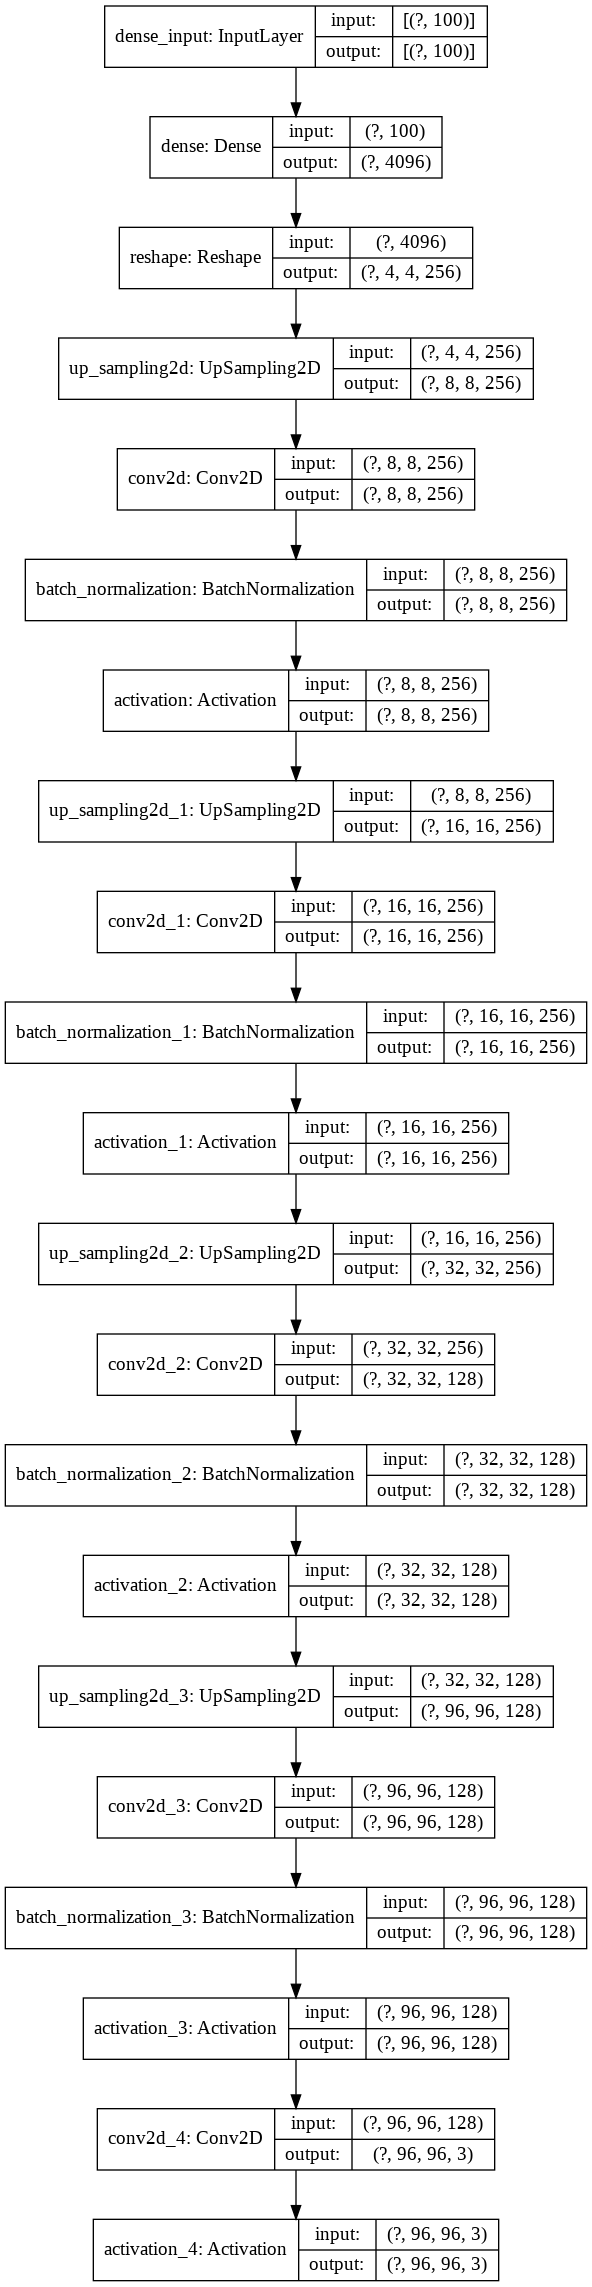

In [0]:
plot_model(generator, show_shapes=True, show_layer_names=True)

To view our first generated image, we can use `matplotlib` to generate a plot of the image with `plt.imshow()`, and save it with `.savefig()`.

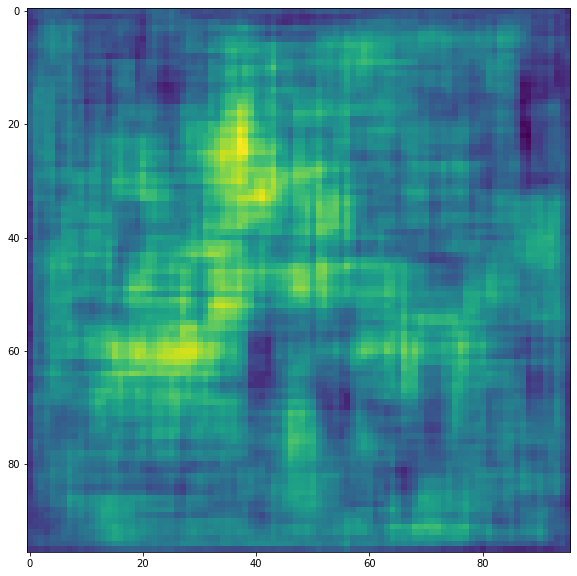

In [0]:
# Change the figure size
plt.figure(figsize=(20,10))
# Show image
plt.imshow(generated_image[0, :, :, 0])
# Save figure
plt.savefig('first_generated_face')

Here we can view the kind of images the generator would produce without being directed by the discriminator. To transform this randomly distributed image into an image that appears similar to our training data, we will need to build the discriminator. We will achieve this in a similar fashion to creating the generator, through a `build_discriminator` function.

##### Discriminator

We will follow many of the same strategies for building the discriminator as we did for the generator, some of the more unique tactics for the discriminator that we will use are:

* Replace any pooling layers with strided convolutions.
* Use LeakyReLU activation in the discriminator for all layers.
* For the last convolution layer is flattened and then fed into a single sigmoid output.
* Use batchnorm for all layers except for the input layer.

With these factors in mind we will create our `build_discriminator` function.

In [0]:
# Create function for building generator
def build_discriminator(image_shape):
    model = Sequential()

    model.add(Conv2D(32, kernel_size=3, strides=2, input_shape=image_shape, 
                     padding="same"))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Dropout(0.25))
    model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
    model.add(ZeroPadding2D(padding=((0,1),(0,1))))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Dropout(0.25))
    model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Dropout(0.25))
    model.add(Conv2D(256, kernel_size=3, strides=1, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Dropout(0.25))
    model.add(Conv2D(512, kernel_size=3, strides=1, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))

    return model

With the `build_discriminator` function created, we can now instantiate our discriminator network. We will also need to feed the discriminator network the training data. Lastly we view the summary and shape of the discriminator network with `.summary()` and `plot_model`.

In [0]:
# Create input_shape variable for discrimintator
image_shape = (GENERATE_SQUARE,GENERATE_SQUARE,IMAGE_CHANNELS)

# Instantiate discriminator network
discriminator = build_discriminator(image_shape)
# View discriminator description
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 48, 48, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 25, 25, 64)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 25, 25, 64)        256       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 25, 25, 64)       

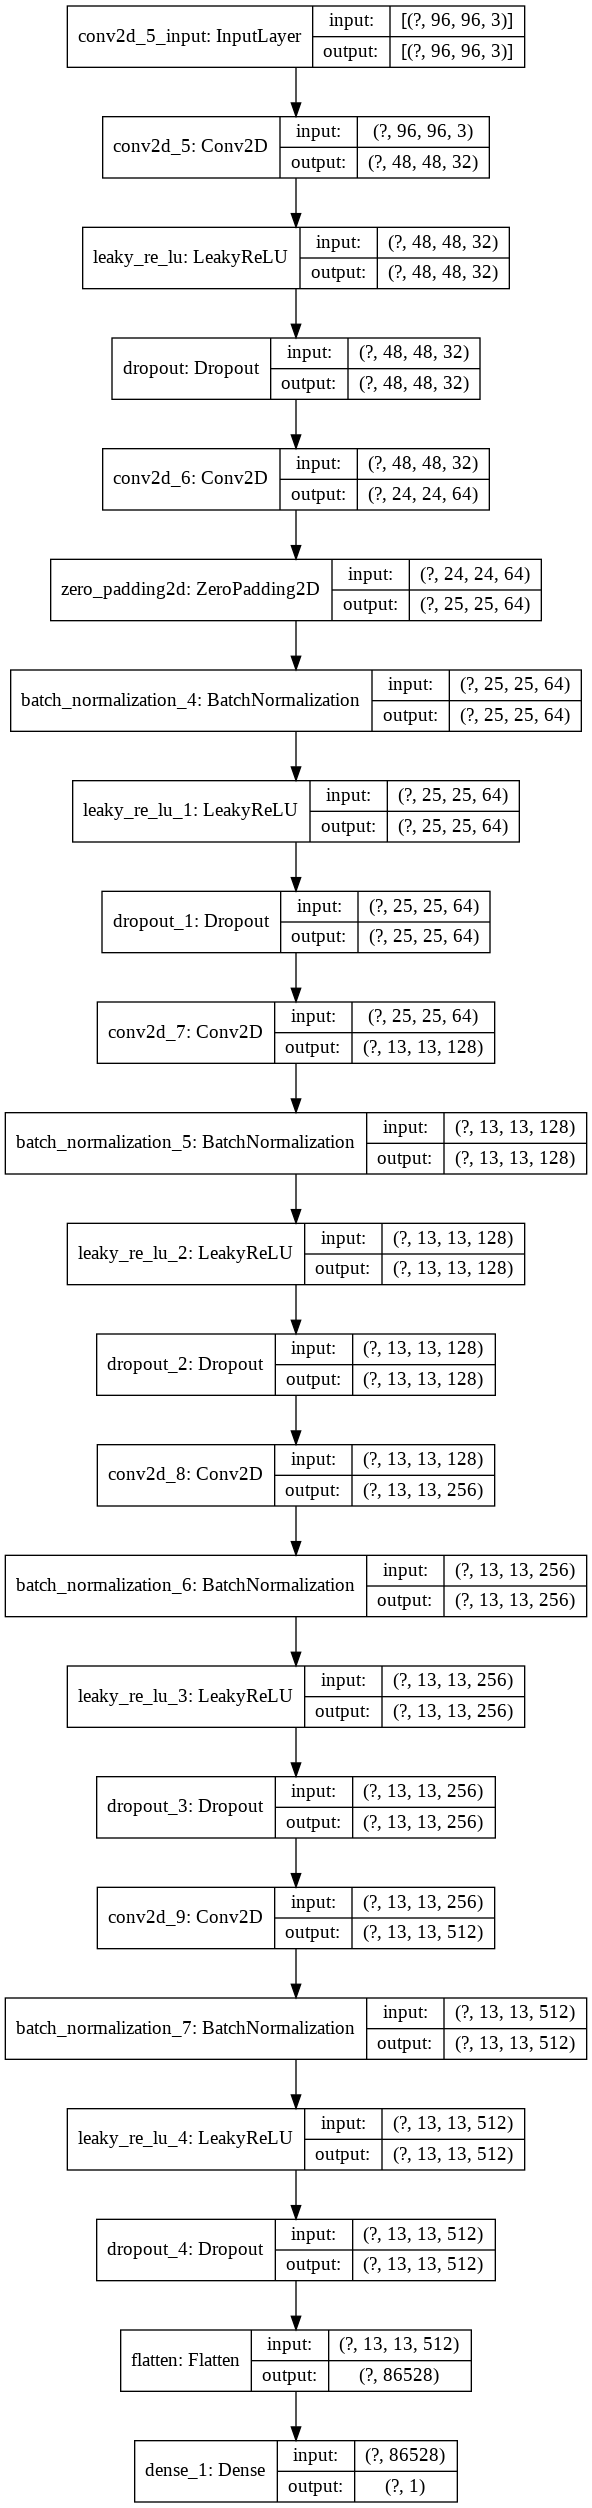

In [0]:
# Return image of model's architecture
plot_model(discriminator, show_shapes=True, show_layer_names=True)

Now we can create an example of the classification the discriminator conducts of deciding whether the input data is either sourced from the training data or the generator's sample. As an example, we can use the generated image seen previously, and print this classification.

In [0]:
# Classification of generated image
decision = discriminator(generated_image)
# View probability
print(decision)

tf.Tensor([[0.5002638]], shape=(1, 1), dtype=float32)


We can see that the discriminator has some training to accomplish, as it is not yet able to accurately classify the images it is fed. As previously stated, the loss formula derives from the cross-entropy between the real and generated distributions, therefore we will need to compute the cross entropy loss. We will do this with a helper function from Keras to compute the `BinaryCrossentropy`.

In [0]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

After creating the `cross_entropy` variable, the loss for the discriminator and generator will need to be created with functions that incorporate the `cross_entropy`. For the discriminator loss, this will involve the summation of the loss of the training sample classification and the generated sample classification. 

In [0]:
# Create the discriminator loss function
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

Likewise the generator loss function can be made by taking the cross entropy of the discriminator's classification of the generator's input.

In [0]:
# Create the generator loss function
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

To complete the process of backpropagation we will need to define the optimizers for both networks. These will be set to Adam with a learning rate of 0.00004.

In [0]:
# Set optimizer for generator
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
# Set optimizer for discriminator
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

We will create a checkpoint directory which contains the various checkpoints created while training the model in the event that training needs to be paused, or resumed.

In [0]:
# Create checkpoint variables
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

We will need to save the images that are produced by the generator to view the performance of the model. We will create a grid of images generated by the generator and save these images, which will later be used to make a gif showing the progression of the GAN.  We will also set previewing parameters for previewing images while our model trains.

In [0]:
# Previewing image parameters 
PREVIEW_ROWS = 4
PREVIEW_COLS = 7
PREVIEW_MARGIN = 16

# Function for saving the generated images
def save_images(cnt,noise):
  image_array = np.full(( 
      PREVIEW_MARGIN + (PREVIEW_ROWS * (GENERATE_SQUARE+PREVIEW_MARGIN)), 
      PREVIEW_MARGIN + (PREVIEW_COLS * (GENERATE_SQUARE+PREVIEW_MARGIN)), 3), 
      255, dtype=np.uint8)
  
  generated_images = generator.predict(noise)

  generated_images = 0.5 * generated_images + 0.5

  image_count = 0
  for row in range(PREVIEW_ROWS):
      for col in range(PREVIEW_COLS):
        r = row * (GENERATE_SQUARE+16) + PREVIEW_MARGIN
        c = col * (GENERATE_SQUARE+16) + PREVIEW_MARGIN
        image_array[r:r+GENERATE_SQUARE,c:c+GENERATE_SQUARE] = generated_images[image_count] * 255
        image_count += 1

          
  output_path = os.path.join(DATA_PATH,'output')
  if not os.path.exists(output_path):
    os.makedirs(output_path)
  
  filename = os.path.join(output_path,f"train-{cnt}.png")
  im = Image.fromarray(image_array)
  im.save(filename)

We can now define the number of epochs our model will train for, as well as the seed that will be fed into the generator. We will in this instance create the seed from the number of examples to generate during each epoch, and the latent noise vector.

In [0]:
# Define number of epochs
EPOCHS = 200
# Define size of noise vector
noise_dim = 100
# Define the number of examples to generate
num_examples_to_generate = 16

# Define the seed to be fed into the generator
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In order to train we will need to create a function that defines the training steps. We will use `tf.function` in order for the function to be compiled by tensorflow. In the function we will take in the noise vector and use the outputs from the training set and the generated set to create a generator and discriminator loss, the gradients of which will be applied to the optimizers for backpropagation.

In [0]:
# Create function for training steps
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

Having created the function for training steps, we will create the function for training the GAN model. For training we simply apply the `train_step` function to the batches of data input into the model. A checkpoint is created every 15 seconds of training, and after the final epoch we save the images generated.

In [0]:
# Create function for training model
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as we go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

Lastly, we create a `generate_and_save_images` function that will use matplotlib to plot the images that the generator creates and save these images as .png files.

In [0]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4,4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5)
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

We are now able to train our GAN using the `train` function previously defined. 

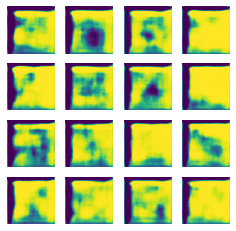

In [0]:
# Train the model
train(train_dataset, EPOCHS)

We can see that the images created during training can barely be said to represent faces, let alone faces related to the LinkedIn connections. This is most likely due to the fact that there is not enough training data present whcih is necessary to effectively train the generator to produce images with discernible faces.

After training we restore the checkpoints in order to be able to continue training from the last stage of the generator.

In [0]:
# Restore the last checkpoint
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

To view a set of images created at a particular epoch we can create a `display_image` function that takes in an epoch number and uses `PIL.Image.open()` to return the particular images requested. This can be done with the final epoch like so.

In [0]:
# Display a single image using the epoch number
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

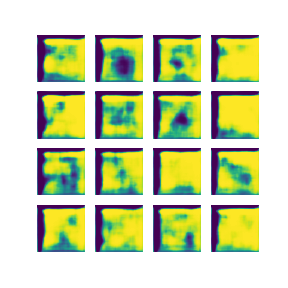

In [0]:
# View last image set created
display_image(EPOCHS)

To more easily view the progression of our GAN we can create a gif file of that uses all of the images created during training. We will achieve this in the following cell.

In [0]:
# Create gif variable
anim_file = 'faces_dcgan_500e.gif'

# Use imageio to read and write the images to create a gif
with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  last = -1
  for i,filename in enumerate(filenames):
    frame = 2*(i**0.5)
    if round(frame) > round(last):
      last = frame
    else:
      continue
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)

if IPython.version_info > (6,2,0,''):
  display.Image(filename=anim_file)

<img src='imgs/notebook_images/faces_dcgan_200e.gif'>

Finally we will download the gif file locally in order to visulaize the progression of the generator during training.

In [0]:
# Download the gif file
try:
  from google.colab import files
except ImportError:
   pass
else:
  files.download(anim_file)

# Conclusion
***

For this section of the work the tasks completed are as follows:

* Prepare notebook for use in Google CoLab, and link it to Google Drive.
* Create a latent noise vector to be fed into the generator network.
* Create the generator and discriminator networks of the GAN model.
* Train the GAN in 200 epochs.
* Generate and save images aimed to match the distribution of scraped LinkedIn image data.

To conclude, while the concept of generating images based off of scraped social media images has been confirmed, for this particular instance there was not enough training data to effectively create faces that resemble the members of a social network. In the next notebook however, we will explore generating lifelike face images using StyleGAN2, an Nvidia GAN architecture reknown for it's high quality output.